# Momentum Trading Strategies

In [3]:
import yfinance as yf
import pandas as pd


In [5]:
components = pd.read_csv('S&P 500 Historical Components & Changes(07-12-2025).csv', index_col=0)
components.index = pd.to_datetime(components.index)
components = components.loc['2010-01-01':'2025-02-01']
components

,tickers
date,
2010-01-06,"A,AABA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,ADSK,..."
2010-01-07,"A,AABA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,ADSK,..."
2010-01-08,"A,AABA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,ADSK,..."
2010-01-21,"A,AABA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,ADSK,..."
2010-01-27,"A,AABA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,ADSK,..."
...,...
2024-09-23,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-09-30,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-10-01,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."


In [6]:
#To avoid lookahead bias
def get_tickers_date(components, date):
    if date >= components.index[-1]:
        ticks = components.iloc[-1].tickers
    else:
        ticks = components.loc[date:].iloc[0].tickers
    return ticks.split(',')

In [7]:
all_tickers = set()
for tickers in components.tickers:
    all_tickers.update(tickers.split(','))

spx_tickers = sorted(all_tickers)

In [8]:
df = yf.download(spx_tickers, start='2010-01-01', end='2025-02-01')['Close']

C:\Users\Study\AppData\Local\Temp\ipykernel_36508\3106007351.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(spx_tickers, start='2010-01-01', end='2025-02-01')['Close']
[*********************100%***********************]  813 of 813 completed

158 Failed downloads:
['HSP', 'XTO', 'BNI', 'FDO', 'HSH', 'FRC', 'MIL', 'MNK', 'SWY', 'SIAL', 'CMCSK', 'RSHCQ', 'CPGX', 'LLTC', 'POM', 'CEPH', 'BF.B', 'MJN', 'COG', 'JNS', 'APOL', 'LO', 'ARG', 'HCBK', 'BJS', 'GGP', 'BIG', 'KORS', 'BTUUQ', 'TWTR', 'ANRZQ', 'TWC', 'BRCM', 'NYX', 'PGN', 'MWW', 'QLGC', 'CFN', 'GMCR', 'STJ', 'NVLS', 'CAM', 'KRFT', 'GENZ', 'WFM', 'LVLT', 'JOY', 'Q', 'BCR', 'SUNEQ', 'LXK', 'CVC', 'SPLS', 'MWV', 'NOVL', 'RAI', 'NLSN', 'SNI', 'BXLT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2025-02-01)')
['NBL', 'DRE', 'MRO', 'LLL', 'DISCA', 'VIAC', 'AKS', 'CTLT', 'DISCK', 'CELG', 'LSI', 'LM', 'VIAB', 'WYND', 'MYL', 'LIFE', 'DWDP', 'ALTR', 'AVP',

In [9]:
df

Ticker,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,19.931616,NaN,4.496876,35.123005,6.431897,NaN,NaN,NaN,NaN,18.496677,...,38.568718,30.323160,10.937250,NaN,NaN,18.697773,51.989998,28.670000,10.055861,NaN
2010-01-05,19.715113,NaN,5.005957,34.914238,6.443017,NaN,NaN,NaN,NaN,18.347235,...,38.719330,29.962683,10.949921,NaN,NaN,18.633831,53.635799,28.620001,10.410416,NaN
2010-01-06,19.645063,NaN,4.798554,35.218697,6.340532,NaN,NaN,NaN,NaN,18.449125,...,39.053959,30.160086,10.848532,NaN,NaN,18.500618,53.618465,28.400000,11.315670,NaN
2010-01-07,19.619591,NaN,4.939964,35.209988,6.328812,NaN,NaN,NaN,NaN,18.601955,...,38.931259,30.554909,10.899228,NaN,NaN,18.495291,54.848484,27.690001,12.583027,NaN
2010-01-08,19.613228,NaN,4.845690,35.349148,6.370887,NaN,NaN,NaN,NaN,18.697052,...,38.775101,30.554909,10.861209,NaN,NaN,18.500618,53.696430,27.600000,12.379346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,150.323395,NaN,17.200001,48.632648,229.306854,173.779190,NaN,NaN,128.960007,128.257492,...,108.196785,19.215292,9.428546,NaN,121.414505,129.638474,112.048752,399.359985,56.854233,171.873352
2025-01-28,149.705994,NaN,17.150000,48.178135,237.686630,171.726074,NaN,NaN,131.050003,126.235985,...,106.104935,19.225092,8.884777,NaN,120.579765,128.004257,111.332153,405.589996,56.824722,169.280823
2025-01-29,146.469711,NaN,17.330000,48.158379,238.783981,172.168137,NaN,NaN,132.580002,126.701729,...,106.723656,19.234888,8.370141,NaN,120.490334,127.934921,110.525978,399.589996,56.696850,169.082138


In [10]:
monthly_prices = df.resample('ME').last()
monthly_prices

Ticker,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,17.849308,NaN,5.005957,34.314075,5.772207,NaN,NaN,NaN,NaN,18.111736,...,35.936111,28.778257,11.051304,NaN,NaN,18.335852,48.785019,26.100000,14.310548,NaN
2010-02-28,20.033508,NaN,6.910295,35.488335,6.149686,NaN,NaN,NaN,NaN,18.570171,...,36.490551,28.400608,11.875084,NaN,NaN,18.073229,49.659889,28.570000,13.993942,NaN
2010-03-31,21.899309,NaN,6.929149,36.512344,7.062734,NaN,NaN,NaN,NaN,18.022787,...,37.602116,29.980291,12.411701,NaN,NaN,20.544083,51.279709,29.600000,16.484770,NaN
2010-04-30,23.090113,NaN,6.665182,39.282146,7.846849,NaN,NaN,NaN,NaN,17.650213,...,38.045612,31.501675,13.875648,NaN,NaN,22.852835,52.760929,29.049999,21.685324,NaN
2010-05-31,20.606628,NaN,8.324408,45.083008,7.720322,NaN,NaN,NaN,NaN,16.408216,...,34.172337,27.874462,11.851584,NaN,NaN,22.060915,48.447182,27.500000,18.083893,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,147.346497,NaN,11.240000,38.057087,232.183853,190.661270,NaN,NaN,126.809998,111.860229,...,114.182266,26.293917,9.796322,NaN,133.809357,137.706879,107.199318,370.320007,46.115643,193.031616
2024-10-31,129.521072,NaN,13.400000,35.070473,225.118683,198.402451,NaN,NaN,134.789993,111.756531,...,113.753670,22.514046,7.710593,NaN,120.679131,129.279449,106.176476,381.970001,50.842445,177.049683
2024-11-30,137.134689,NaN,14.520000,40.632221,236.758865,178.024017,NaN,NaN,136.110001,117.079666,...,115.847267,19.093699,8.626049,NaN,125.955879,136.947906,111.320457,407.000000,59.529728,173.553864


In [11]:
momentum = monthly_prices.pct_change(12).shift(1)
momentum

C:\Users\Study\AppData\Local\Temp\ipykernel_36508\273257969.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  momentum = monthly_prices.pct_change(12).shift(1)


Ticker,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.188982,NaN,-0.279022,-0.330818,0.225165,0.387416,NaN,NaN,-0.108248,0.123664,...,0.097898,-0.304835,-0.239862,NaN,0.343571,0.063450,-0.022685,0.255882,0.454340,-0.027285
2024-10-31,0.337419,NaN,-0.122561,-0.291445,0.367866,0.376023,NaN,NaN,-0.075796,0.201656,...,0.031893,-0.190814,-0.289054,NaN,0.500435,0.140339,-0.030022,0.565637,0.409899,0.134153
2024-11-30,0.269165,NaN,0.201794,-0.301531,0.329660,0.496830,NaN,NaN,0.139488,0.222976,...,0.141942,-0.221698,-0.316215,NaN,0.316891,0.106692,0.032587,0.823855,0.757972,0.150004


In [12]:
portfolio = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
portfolio

Ticker,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XOM,XRAY,XRX,XTO,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Picking Top 20 Stocks With Equal Weights

In [14]:
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_20 = pf_date.nlargest(20).index
    portfolio.loc[date,top_20] = 1/20

In [15]:
returns = monthly_prices.pct_change().shift(-1)

C:\Users\Study\AppData\Local\Temp\ipykernel_36508\2233721856.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = monthly_prices.pct_change().shift(-1)


In [16]:
strategy_returns = (portfolio * returns).sum(axis=1)

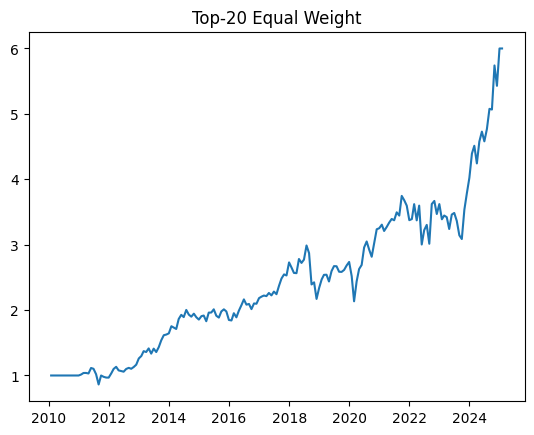

Total growth from 2010 to 2025: 499.89%


In [17]:
import matplotlib.pyplot as plt
cumulative_returns = (1+strategy_returns).cumprod()
plt.plot(cumulative_returns)
plt.title('Top-20 Equal Weight')
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
total_return = cumulative_returns[-1] - 1
print(f"Total growth from 2010 to 2025: {total_return:.2%}")


In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
total_return = cumulative_returns[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 1: {total_return:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 1: 499.89%


## Long-Short Momentum Strategy For Top 20 and Bottom 20 Stocks With Equal Weights 

In [20]:
portfolio2 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_20 = pf_date.nlargest(20).index
    portfolio2.loc[date,top_20] = 1/20
    bottom_20 = pf_date.nsmallest(20).index
    portfolio2.loc[date, bottom_20] = -1/20

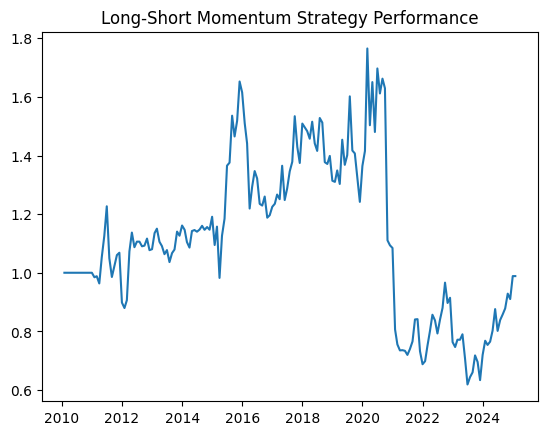

In [21]:
strategy_returns2 = (portfolio2 * returns).sum(axis=1)
cumulative_returns2 = (1+strategy_returns2).cumprod()
plt.plot(cumulative_returns2)
plt.title('Long-Short Momentum Strategy Performance')
plt.show()


In [22]:
total_return2 = cumulative_returns2[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 2: {total_return2:.2%}")

Total cumulative growth from 2010 to 2025 for strategy 2: -1.14%


## Picking Top 10 Stocks With Equal Weights  

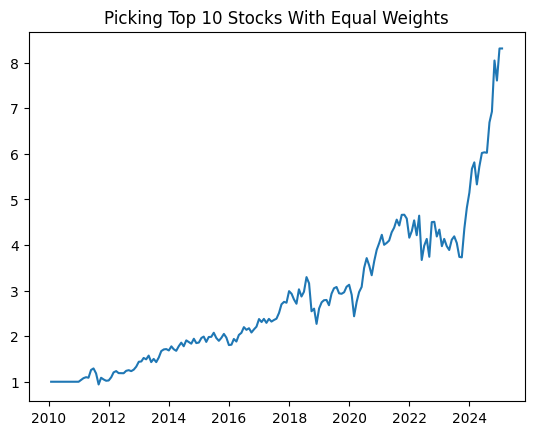

In [24]:
portfolio3 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    portfolio3.loc[date,top_10] = 1/10


strategy_returns3 = (portfolio3 * returns).sum(axis=1)
cumulative_returns3 = (1+strategy_returns3).cumprod()
plt.plot(cumulative_returns3)
plt.title('Picking Top 10 Stocks With Equal Weights')
plt.show()

In [25]:
total_return3 = cumulative_returns3[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 3: {total_return3:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 3: 731.28%


## Long-Short Momentum Strategy For Top 10 and Bottom 10 Stocks With Equal Weights 

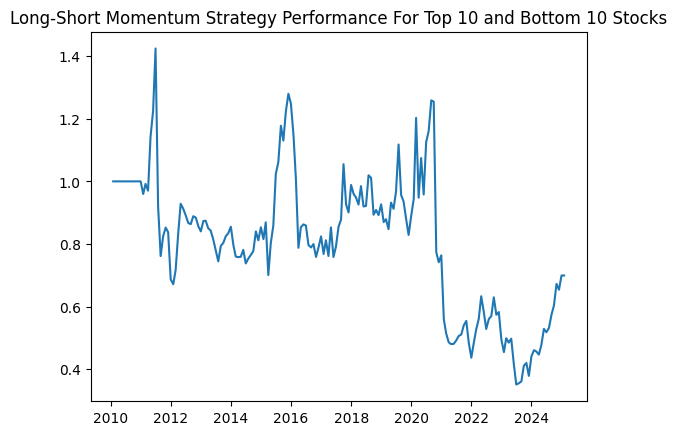

In [27]:
portfolio4 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    portfolio4.loc[date,top_10] = 1/10
    bottom_10 = pf_date.nsmallest(10).index
    portfolio4.loc[date, bottom_10] = -1/10

strategy_returns4 = (portfolio4 * returns).sum(axis=1)
cumulative_returns4 = (1+strategy_returns4).cumprod()
plt.plot(cumulative_returns4)
plt.title('Long-Short Momentum Strategy Performance For Top 10 and Bottom 10 Stocks')
plt.show()


In [28]:
total_return4 = cumulative_returns4[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 4: {total_return4:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 4: -30.05%


## Momentum-Proportional Weights

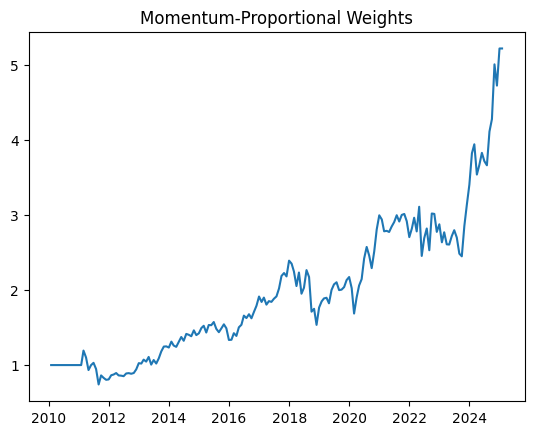

In [30]:
portfolio5 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    raw_scores = pf_date.loc[top_10]
    weights = raw_scores / raw_scores.sum()
    portfolio5.loc[date, top_10] = weights

strategy_returns5 = (portfolio5 * returns).sum(axis=1)
cumulative_returns5 = (1+strategy_returns5).cumprod()
plt.plot(cumulative_returns5)
plt.title('Momentum-Proportional Weights')
plt.show()

In [31]:
total_return5 = cumulative_returns5[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 5: {total_return5:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 5: 421.36%


## Rank-Based Linearly Decreasing Weights

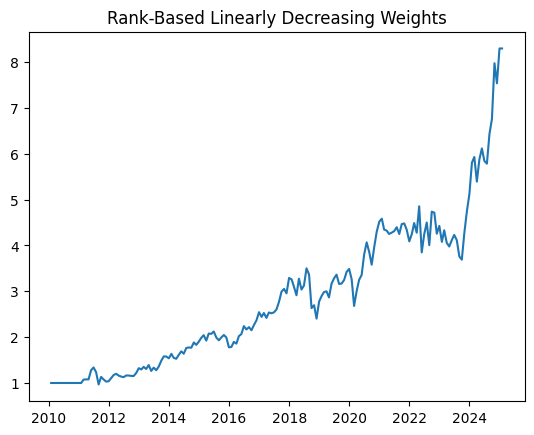

In [33]:
portfolio6 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    ranks = pf_date.loc[top_10].rank(ascending=False)
    weights = (11 - ranks) / (11 - ranks).sum()
    portfolio6.loc[date, top_10] = weights

strategy_returns6 = (portfolio6 * returns).sum(axis=1)
cumulative_returns6 = (1+strategy_returns6).cumprod()
plt.plot(cumulative_returns6)
plt.title('Rank-Based Linearly Decreasing Weights')
plt.show()

In [34]:
total_return6 = cumulative_returns6[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 6: {total_return6:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 6: 729.32%


## Top 1 Fully Allocated 

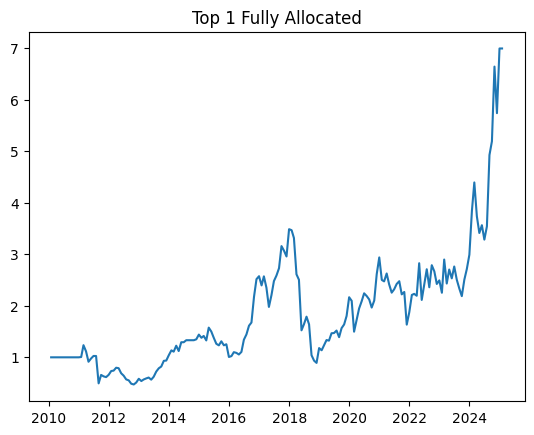

In [36]:
portfolio7 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components,date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_1 = pf_date.nlargest(1).index
    portfolio7.loc[date, top_1] = 1

strategy_returns7 = (portfolio7 * returns).sum(axis=1)
cumulative_returns7 = (1+strategy_returns7).cumprod()
plt.plot(cumulative_returns7)
plt.title('Top 1 Fully Allocated')
plt.show()

In [37]:
total_return7 = cumulative_returns7[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 7: {total_return7:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 7: 599.34%


## Low-Vol Weighted Top-10 Momentum

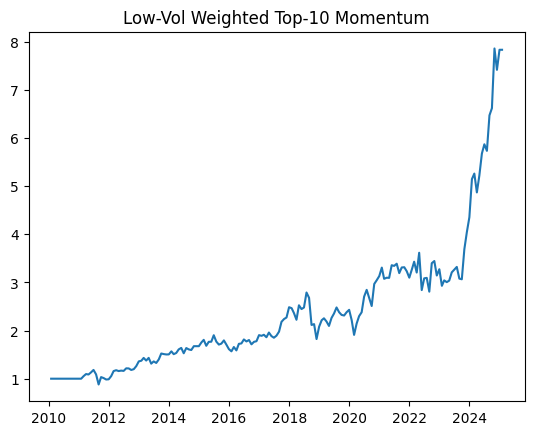

In [39]:
portfolio8 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
volatility = monthly_prices.pct_change().rolling(window=3).std()
for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components, date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    vol = volatility.loc[date, top_10]
    vol = vol.dropna()
    if len(vol) < 10:
        continue
    inv_vol = 1 / vol
    weights = inv_vol / inv_vol.sum()
    portfolio8.loc[date, weights.index] = weights


strategy_returns8 = (portfolio8 * returns).sum(axis=1)
cumulative_returns8 = (1+strategy_returns8).cumprod()
plt.plot(cumulative_returns8)
plt.title('Low-Vol Weighted Top-10 Momentum')
plt.show()

In [40]:
total_return8 = cumulative_returns8[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 8: {total_return8:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 8: 683.28%


## Momentum-Proportional Weights for Top 10 Stocks Adjusted by Inverse Volatility

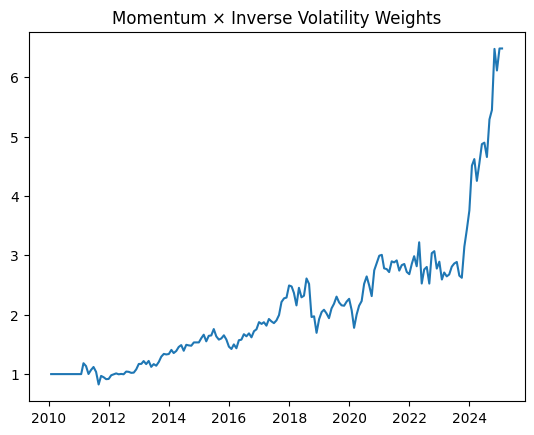

In [42]:
portfolio9 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
volatility = monthly_prices.pct_change().rolling(window=3).std()

for date in momentum.index[12:]:
    pf_date = momentum.loc[date]
    rel_tickers = get_tickers_date(components, date)
    pf_date = pf_date[pf_date.index.isin(rel_tickers)]
    top_10 = pf_date.nlargest(10).index
    mom_scores = pf_date.loc[top_10]
    vol = volatility.loc[date, top_10].dropna()
    common_tickers = mom_scores.index.intersection(vol.index)
    if len(common_tickers) < 10:
        continue
    adj_scores = mom_scores[common_tickers] / vol[common_tickers]
    weights = adj_scores / adj_scores.sum()
    portfolio9.loc[date, weights.index] = weights


strategy_returns9 = (portfolio9 * returns).sum(axis=1)
cumulative_returns9 = (1 + strategy_returns9).cumprod()

plt.plot(cumulative_returns9)
plt.title('Momentum × Inverse Volatility Weights')
plt.show()


In [43]:
total_return9 = cumulative_returns9[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 9: {total_return9:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 9: 548.30%


## Minimum Volatility Portfolio from Top-20 Momentum Stocks

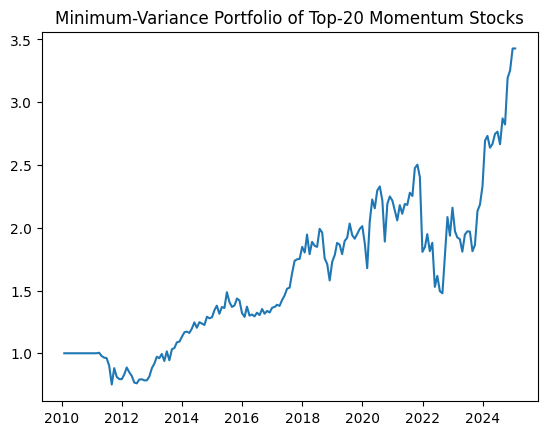

In [45]:
import numpy as np
from scipy.optimize import minimize

portfolio10 = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)
lookback = 3
for date in momentum.index[12:]:
    rel_tickers = get_tickers_date(components, date)
    mom_today   = momentum.loc[date, rel_tickers]
    top_20 = mom_today.nlargest(20).index
    window = returns.loc[:date, top_20].dropna().tail(lookback)
    if window.shape[0] < lookback:
        continue
    Sigma = window.cov().values                 
    # objective
    def port_var(w, Sigma=Sigma):
        return w @ Sigma @ w
    #constraints & bounds
    n       = len(top_20)
    w0      = np.repeat(1/n, n)                 
    bounds  = [(0.0, 1.0)] * n                   
    cons    = ({'type': 'eq',                  
                'fun': lambda w: np.sum(w) - 1},)
    result = minimize(port_var,
                      w0,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=cons)
    if not result.success:
        continue
    weights = pd.Series(result.x, index=top_20)
    portfolio10.loc[date, top_20] = weights

strategy_returns10   = (portfolio10.shift() * returns).sum(axis=1).fillna(0)
cumulative_returns10 = (1 + strategy_returns10).cumprod()

plt.plot(cumulative_returns10)
plt.title('Minimum-Variance Portfolio of Top-20 Momentum Stocks')
plt.show()


In [46]:
total_return10 = cumulative_returns10[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for strategy 10: {total_return10:.2%}")


Total cumulative growth from 2010 to 2025 for strategy 10: 242.80%


## Fetching S&P 500 Returns For Comparison 

[*********************100%***********************]  1 of 1 completed


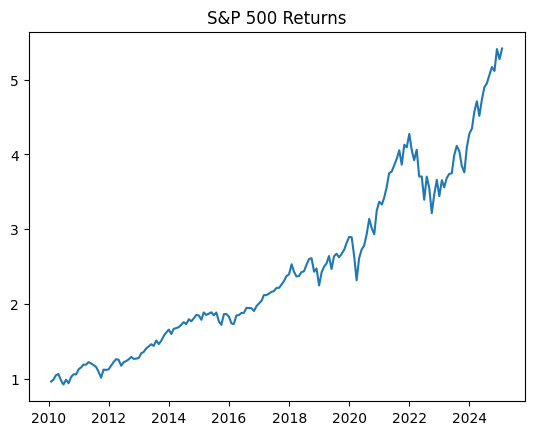

In [48]:
spx_data = yf.download("^GSPC", start="2009-12-01", end="2025-02-01", interval="1d")
monthly_close = spx_data['Close'].resample('M').last()
spx = monthly_close.pct_change().dropna()
spx = spx.rename(columns={"^GSPC": "SPX"})
spx = spx.squeeze()
cumulative_spx = (1 + spx).cumprod()
plt.plot(cumulative_spx)
plt.title('S&P 500 Returns')
plt.show()

In [49]:
total_growth = cumulative_spx[-1] - 1
print(f"Total cumulative growth from 2010 to 2025 for S&P 500: {(total_growth):.2%}")


Total cumulative growth from 2010 to 2025 for S&P 500: 441.70%


# Statistics 

In [51]:
#Getting risk free rates for sharpe ratio
import pandas_datareader.data as web
rf_daily = web.DataReader('DTB4WK', 'fred',
                         start='2010-01-01',
                         end=pd.to_datetime('today'))
monthly_rf = ((1 + rf_daily/100) ** (1/12)) - 1
monthly_rf.columns = ['Monthly_RF']
monthly_rf = monthly_rf.resample('M').last().dropna()
monthly_rf

,Monthly_RF
DATE,
2010-01-31,0.000017
2010-02-28,0.000075
2010-03-31,0.000125
2010-04-30,0.000117
2010-05-31,0.000125
...,...
2025-03-31,0.003466
2025-04-30,0.003458
2025-05-31,0.003450


In [52]:
strategies = [
    strategy_returns, strategy_returns2, strategy_returns3,
    strategy_returns4, strategy_returns5, strategy_returns6,
    strategy_returns7, strategy_returns8, strategy_returns9,
    strategy_returns10
]

shapes = [s.shape for s in strategies]
if all(shape == shapes[0] for shape in shapes):
    print("All strategy return DataFrames have the same shape:", shapes[0])
else:
    for i, shape in enumerate(shapes, start=1):
        print(f"Shape of strategy_returns{i}: {shape}")


All strategy return DataFrames have the same shape: (181,)


In [53]:
#All strategy return DataFrames have the same shape so it doesn't matter which one to use for risk free rate
rf_series = monthly_rf['Monthly_RF'].reindex(strategy_returns.index).fillna(method='ffill')


In [54]:
from scipy.stats import norm

def annualize_rets(r, periods_per_year):
        compounded_growth = (1+r).prod()
        n_periods = r.shape[0]
        return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio (r, riskfree_rate, periods_per_year):
        rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
        excess_ret = r - rf_per_period
        ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
        ann_vol = annualize_vol(r, periods_per_year)
        return ann_ex_ret/ann_vol

def skewness(r):
        demeaned_r = r - r.mean()
        sigma_r = r.std(ddof=0)
        exp = (demeaned_r**3).mean()
        return exp/sigma_r**3

def kurtosis(r):
        demeaned_r = r - r.mean()
        sigma_r = r.std(ddof=0)
        exp = (demeaned_r**4).mean()
        return exp/sigma_r**4

def var_gaussian(r, level=5, modified=False):
        z = norm.ppf(level/100)
        if modified:
            s = skewness (r)
            k = kurtosis (r)
            z= (z+
                (z**2 - 1)*s/6 + 
                (z**3 - 3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36)
        return -(r.mean() + z * r.std(ddof=0))

def var_historic(r, level=5):
    if isinstance(r, pd.DataFrame): 
        return r.aggregate(var_historic, level=level)
    elif isinstance (r, pd.Series):
        return -np.percentile(r, level) 
    else: 
        raise TypeError("Expected r to be Series or DataFrame")
        

def cvar_historic(r, level=5):
        if isinstance(r, pd.Series):
            is_beyond = r <= -var_historic(r, level=level)
            return -r[is_beyond].mean()
        elif isinstance (r, pd.DataFrame):
            return r.aggregate(cvar_historic, level=level)
        else:
            raise TypeError("Expected r to be a Series or DataFrame")

def drawdown (return_series: pd.Series):
        wealth_index = 1000*(1+return_series).cumprod()
        previous_peaks = wealth_index.cummax()
        drawdowns = (wealth_index - previous_peaks)/previous_peaks
        return pd.DataFrame({
            "Wealth": wealth_index,
            "Peaks": previous_peaks,
            "Drawdown": drawdowns})

def summary_stats(r, riskfree_rate):
    stats = {
        "Annualized Return":        pd.Series(r.aggregate(annualize_rets, periods_per_year=12)),
        "Annualized Volatility":    pd.Series(r.aggregate(annualize_vol, periods_per_year=12)),
        "Sharpe Ratio":             pd.Series(r.aggregate(lambda x: sharpe_ratio(x, riskfree_rate, periods_per_year=12))),
        "Skewness":                 pd.Series(r.aggregate(skewness)),
        "Kurtosis":                 pd.Series(r.aggregate(kurtosis)),
        "Gaussian VaR (5%)":        pd.Series(r.aggregate(var_gaussian, modified=False)),
        "Cornish–Fisher VaR (5%)":  pd.Series(r.aggregate(var_gaussian, modified=True)),
        "CVaR (5%)":       pd.Series(r.aggregate(cvar_historic)),
        "Max Drawdown":             pd.Series(r.aggregate(lambda x: drawdown(x).Drawdown.min())),
    }
    
    return pd.DataFrame(stats)

In [55]:
import numpy as np
strategy_list = [spx,
    strategy_returns, strategy_returns2, strategy_returns3,
    strategy_returns4, strategy_returns5, strategy_returns6,
    strategy_returns7, strategy_returns8, strategy_returns9,
    strategy_returns10
]

strategy_names = [
    "S&P 500 returns",
    "Picking Top 20 Stocks With Equal Weights",
    "Long-Short Momentum Strategy For Top 20 and Bottom 20 Stocks With Equal Weights",
    "Picking Top 10 Stocks With Equal Weights",
    "Long-Short Momentum Strategy For Top 10 and Bottom 10 Stocks With Equal Weights",
    "Momentum-Proportional Weights",
    "Rank-Based Linearly Decreasing Weights",
    "Top 1 Fully Allocated",
    "Low-Vol Weighted Top-10 Momentum",
    "Momentum-Proportional Weights for Top 10 Stocks Adjusted by Inverse Volatility",
    "Minimum Volatility Portfolio from Top-20 Momentum Stocks"
]

summary_list = []

for strategy, name in zip(strategy_list, strategy_names):
    summary = summary_stats(strategy.to_frame(name), rf_series)
    summary_list.append(summary)

final_summary = pd.concat(summary_list)
final_summary

,Annualized Return,Annualized Volatility,Sharpe Ratio,Skewness,Kurtosis,Gaussian VaR (5%),Cornish–Fisher VaR (5%),CVaR (5%),Max Drawdown
S&P 500 returns,0.118529,0.145365,0.808044,-0.366725,3.501279,0.058576,0.062410,0.085520,-0.247695
Picking Top 20 Stocks With Equal Weights,0.126120,0.189003,0.661603,-0.152454,4.727234,0.078068,0.078505,0.111914,-0.285585
Long-Short Momentum Strategy For Top 20 and Bottom 20 Stocks With Equal Weights,-0.000759,0.249298,-0.006907,-0.564304,5.961389,0.115430,0.122224,0.175286,-0.649414
Picking Top 10 Stocks With Equal Weights,0.150742,0.224041,0.667942,-0.341368,4.523540,0.092218,0.096352,0.134447,-0.311238
Long-Short Momentum Strategy For Top 10 and Bottom 10 Stocks With Equal Weights,-0.023418,0.318066,-0.076582,-0.760499,5.658185,0.148093,0.161981,0.230204,-0.753196
Momentum-Proportional Weights,0.115694,0.240350,0.476923,-0.350098,4.248174,0.102218,0.107201,0.151721,-0.378213
Rank-Based Linearly Decreasing Weights,0.150561,0.238777,0.625959,-0.316735,4.269440,0.098923,0.103221,0.142703,-0.313262
Top 1 Fully Allocated,0.137631,0.443791,0.307673,-0.390475,5.189713,0.190675,0.198844,0.284267,-0.744246
Low-Vol Weighted Top-10 Momentum,0.146213,0.233488,0.621557,-0.049719,4.717688,0.096868,0.095485,0.135770,-0.346608
Momentum-Proportional Weights for Top 10 Stocks Adjusted by Inverse Volatility,0.131929,0.244835,0.534454,-0.032915,4.511374,0.103071,0.101580,0.142929,-0.350505


## 